In [152]:
import pandas as pd 
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [153]:
def read(path,output_path_1,output_path_2,classi):
    data = np.fromfile(path, dtype=np.int16)
    df = pd.DataFrame({'EMG': data})
    # CSV saving 
    df.to_csv(output_path_2, index=False)
    df0= pd.read_csv(output_path_2, header=None)
    df0 = df0.drop(0)
    df0 = df0.reset_index(drop=True)
    # add the class labels
    new0 = pd.DataFrame({"class": [classi] * len(df0)})
    df0 = pd.concat([df0, new0], axis=1)
    # CSV saving 
    df0.to_csv(output_path_1, index=False, header=False)
    return

# EMG signal importation for subject 1
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-50\emg.dat",r".\our_input_30\0.csv",r".\our_input_30\emg_ext.csv",0) # fist
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-51\emg.dat",r".\our_input_30\1.csv",r".\our_input_30\emg_fist.csv",1) #extension
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-52\emg.dat",r".\our_input_30\2.csv",r".\our_input_30\emg_thumb.csv",2) # thumb
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-53\emg.dat",r".\our_input_30\3.csv",r".\our_input_30\emg_finger2.csv",3) # finger 2
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-54\emg.dat",r".\our_input_30\4.csv",r".\our_input_30\emg_finger3.csv",4) # finger 3
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-72\emg.dat",r".\our_input_30\5.csv",r".\our_input_30\emg_finger4.csv",5) #finger 4
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-78\emg.dat",r".\our_input_30\6.csv",r".\our_input_30\emg_finger5.csv",6) #finger 5

# # EMG signal importation for subject 2
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-59\emg.dat",r".\our_input_subject2\0.csv",r".\our_input_subject2\emg_ext.csv",0) # fist
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-60\emg.dat",r".\our_input_subject2\1.csv",r".\our_input_subject2\emg_fist.csv",1) #extension
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-61\emg.dat",r".\our_input_subject2\2.csv",r".\our_input_subject2\emg_thumb.csv",2) # thumb
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-62\emg.dat",r".\our_input_subject2\3.csv",r".\our_input_subject2\emg_finger2.csv",3) # finger 2
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-63\emg.dat",r".\our_input_subject2\4.csv",r".\our_input_subject2\emg_finger3.csv",4) # finger 3
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-64\emg.dat",r".\our_input_subject2\5.csv",r".\our_input_subject2\emg_finger4.csv",5) #finger 4
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-65\emg.dat",r".\our_input_subject2\6.csv",r".\our_input_subject2\emg_finger5.csv",6) #finger 5


In [154]:
## collect the data from subject 1
# df0= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_ext.csv", header=None)
# df1= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_fist.csv", header=None)
# df2= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_thumb.csv", header=None)
# df3= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_finger2.csv", header=None)
# df4= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_finger3.csv", header=None)
# df5= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_finger4.csv", header=None)
# df6= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_finger5.csv", header=None)
# # output path for data saving after PCA
# output_path_pca = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\global_pca.csv" 
# output_path_pca3 = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\global_pca3.csv"  

## collect the data from subject 2
df0= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_ext.csv", header=None)
df1= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_fist.csv", header=None)
df2= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_thumb.csv", header=None)
df3= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_finger2.csv", header=None)
df4= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_finger3.csv", header=None)
df5= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_finger4.csv", header=None)
df6= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_finger5.csv", header=None)
# output path for data saving after PCA
output_path_pca = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\global_pca.csv"  
output_path_pca3 = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\global_pca3.csv" 

# paramaters for the features extraction
classNames=['class0','class1','class2','class3','class4','class5','class6'] # for 7 movements
attributeNames= ['mean', 'std_dev', 'variance', 'skewness', 'kurtosis', 'rms', 'waveform_length','mav', 'max_value', 'zero_crossings', 'slope_sign_changes', 'activity', 'complexity']


df0 = df0.drop(0)
df0 = df0.reset_index(drop=True)
df1 = df1.drop(0)
df1 = df1.reset_index(drop=True)
df2 = df2.drop(0)
df2 = df2.reset_index(drop=True)
df3 = df3.drop(0)
df3 = df3.reset_index(drop=True)
df4 = df4.drop(0)
df4 = df4.reset_index(drop=True)
df5 = df5.drop(0)
df5 = df5.reset_index(drop=True)
df6 = df6.drop(0)
df6 = df6.reset_index(drop=True)


In [155]:
## Signal extraction ##
emg_data_0 = df0.iloc[0:, 0].values 
emg_data_0 = emg_data_0.astype(float)
emg_data_1 = df1.iloc[0:, 0].values 
emg_data_1 = emg_data_1.astype(float)
emg_data_2 = df2.iloc[0:, 0].values 
emg_data_2 = emg_data_2.astype(float)
emg_data_3 = df3.iloc[0:, 0].values 
emg_data_3 = emg_data_3.astype(float)
emg_data_4 = df4.iloc[0:, 0].values 
emg_data_4 = emg_data_4.astype(float)
emg_data_5 = df5.iloc[0:, 0].values
emg_data_5 = emg_data_5.astype(float)
emg_data_6 = df6.iloc[0:, 0].values 
emg_data_6 = emg_data_6.astype(float)

sampling_rate = 2504.495361  # sampling rate of the Paragit sensor
# creation of a time array for each of the signals
time_0 = np.arange(0, len(emg_data_0)/sampling_rate, 1/sampling_rate)[0:len(emg_data_0)]
time_1 = np.arange(0, len(emg_data_1)/sampling_rate, 1/sampling_rate)[0:len(emg_data_1)]
time_2 = np.arange(0, len(emg_data_2)/sampling_rate, 1/sampling_rate)[0:len(emg_data_2)]
time_3 = np.arange(0, len(emg_data_3)/sampling_rate, 1/sampling_rate)[0:len(emg_data_3)]
time_4 = np.arange(0, len(emg_data_4)/sampling_rate, 1/sampling_rate)[0:len(emg_data_4)]
time_5 = np.arange(0, len(emg_data_5)/sampling_rate, 1/sampling_rate)[0:len(emg_data_5)]
time_6 = np.arange(0, len(emg_data_6)/sampling_rate, 1/sampling_rate)[0:len(emg_data_6)]


In [156]:
## Filters PARAGIT##

def remove_dc_component(signal):
    return signal - np.mean(signal)

def remove_50hz_line_noise(signal, sampling_rate):
    nyquist = 0.5 * sampling_rate
    low = 49 / nyquist
    high = 51 / nyquist
    b, a = butter(2, [low, high], btype='bandstop')
    return filtfilt(b, a, signal)

def remove_high_frequency(signal, sampling_rate, cutoff_freq):
    nyquist = 0.5 * sampling_rate
    cutoff = cutoff_freq / nyquist
    b, a = butter(4, cutoff, btype='low')
    return filtfilt(b, a, signal)

emg_data_filtered_0 = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_0), sampling_rate), sampling_rate, 700)
emg_data_filtered_1 = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_1), sampling_rate), sampling_rate, 700)
emg_data_filtered_2 = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_2), sampling_rate), sampling_rate, 700)
emg_data_filtered_3 = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_3), sampling_rate), sampling_rate, 700)
emg_data_filtered_4 = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_4), sampling_rate), sampling_rate, 700)
emg_data_filtered_5 = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_5), sampling_rate), sampling_rate, 700)
emg_data_filtered_6 = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_6), sampling_rate), sampling_rate, 700)



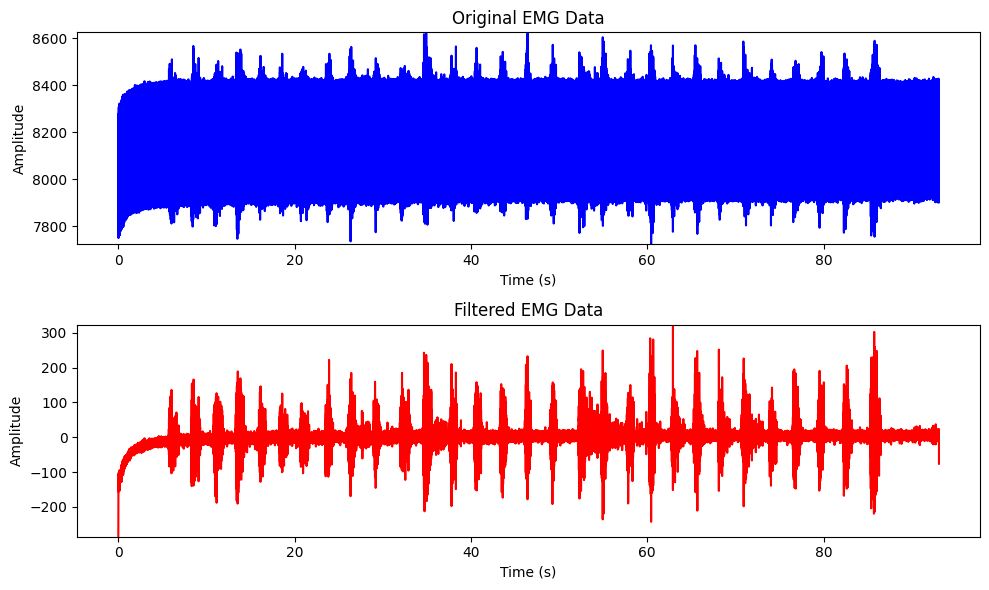

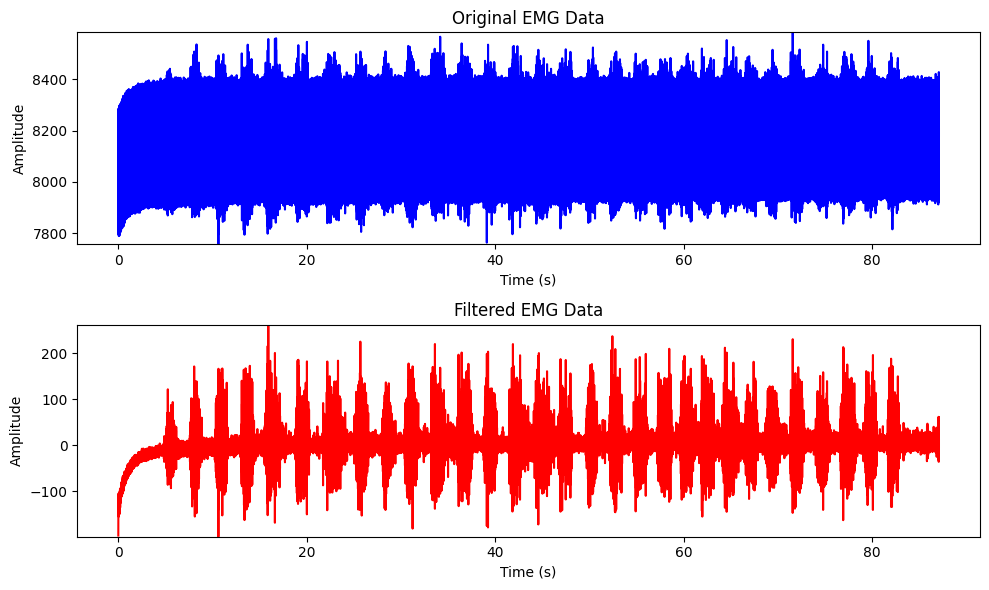

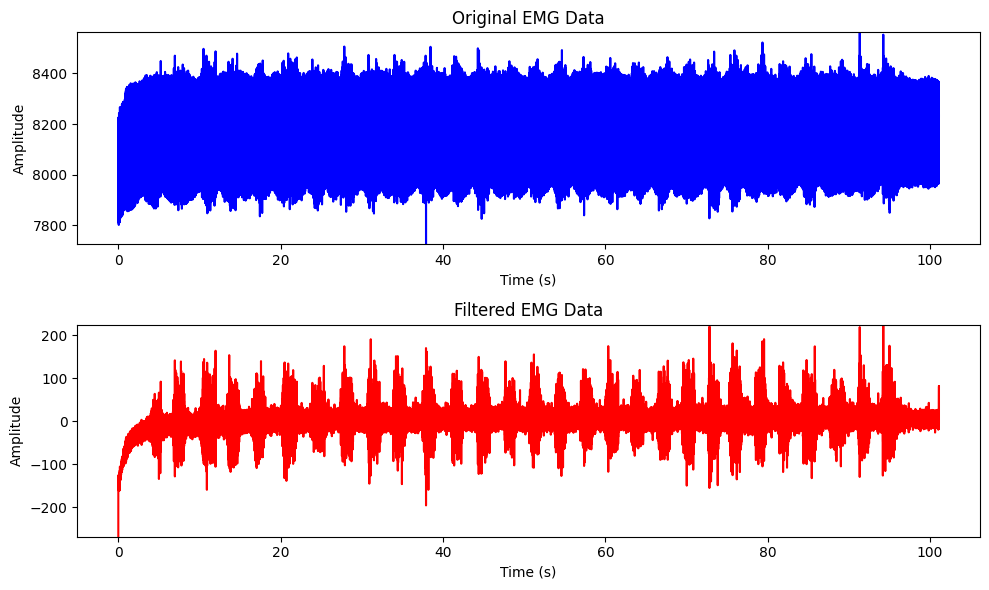

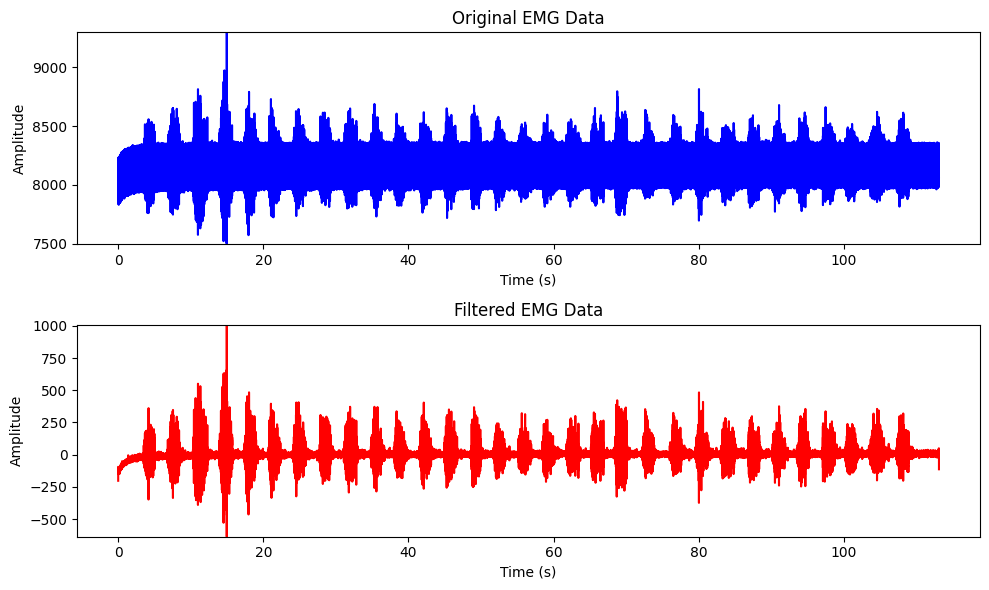

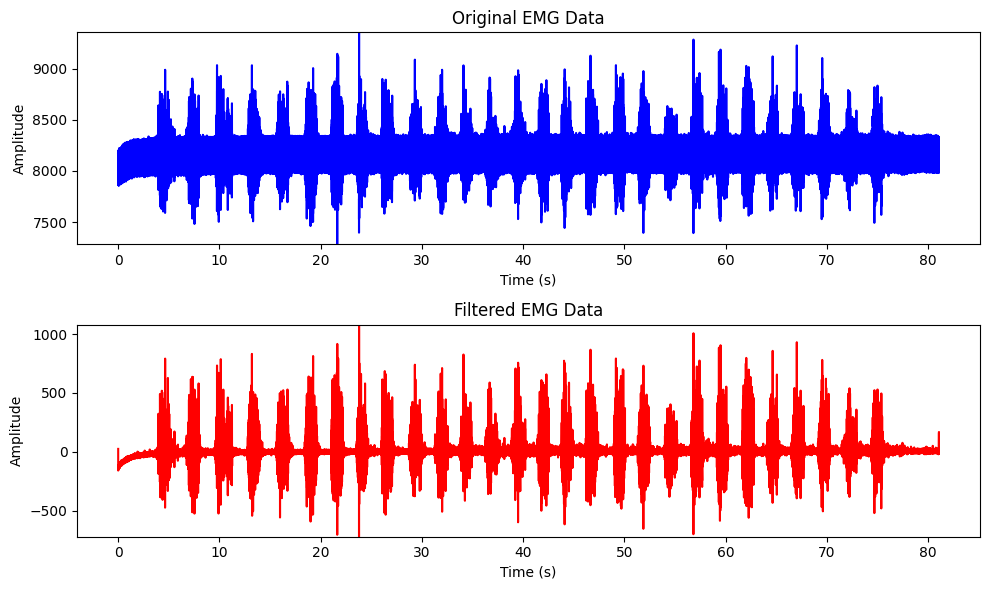

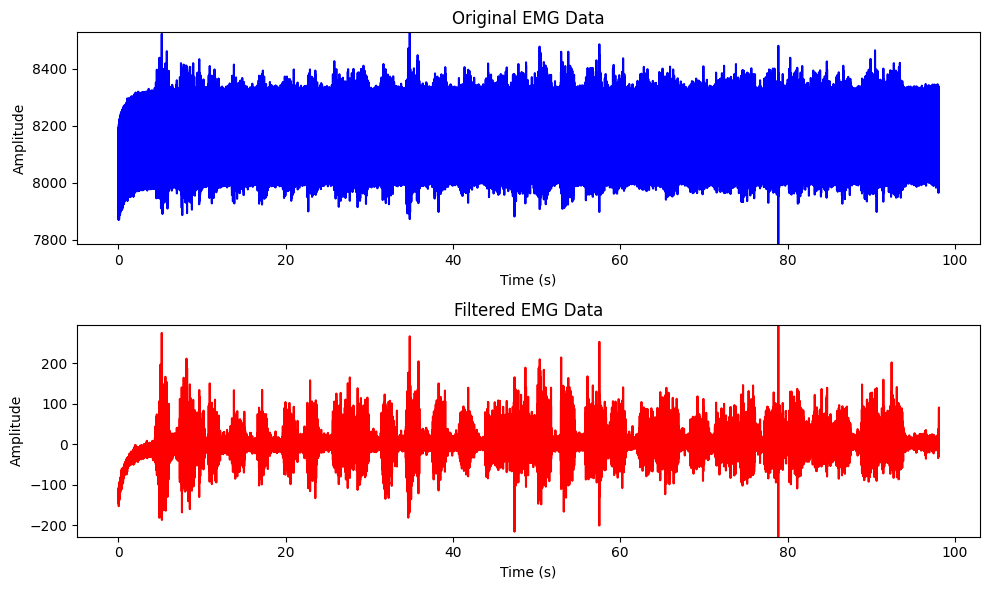

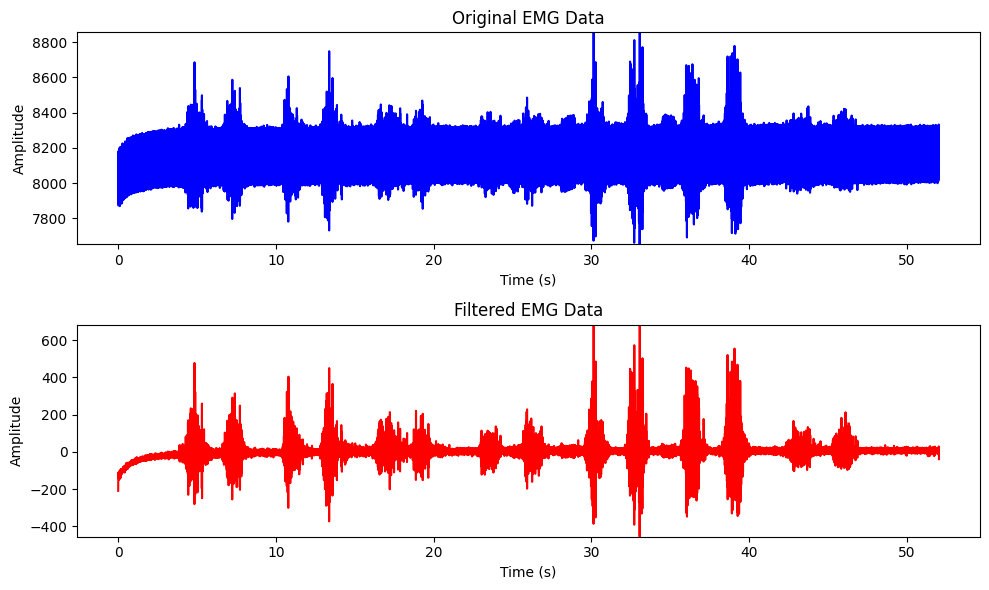

In [157]:
## Visualization PARAGIT - sol 1## 
def plotting(emg,emg_data_filtered,time):
    # Plot original EMG data
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, emg, color='blue')
    plt.title('Original EMG Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.ylim(np.min(emg) - 0.1, np.max(emg) + 0.1)  # Adjust the space on the y-axis
    # Plot filtered EMG data
    plt.subplot(2, 1, 2)
    plt.plot(time, emg_data_filtered, color='red')
    plt.title('Filtered EMG Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.ylim(np.min(emg_data_filtered) - 0.1, np.max(emg_data_filtered) + 0.1)  # Adjust the space on the y-axis
    plt.tight_layout()
    plt.show()
    return

plotting(emg_data_0,emg_data_filtered_0,time_0)
plotting(emg_data_1,emg_data_filtered_1,time_1)
plotting(emg_data_2,emg_data_filtered_2,time_2)
plotting(emg_data_3,emg_data_filtered_3,time_3)
plotting(emg_data_4,emg_data_filtered_4,time_4)
plotting(emg_data_5,emg_data_filtered_5,time_5)
plotting(emg_data_6,emg_data_filtered_6,time_6)

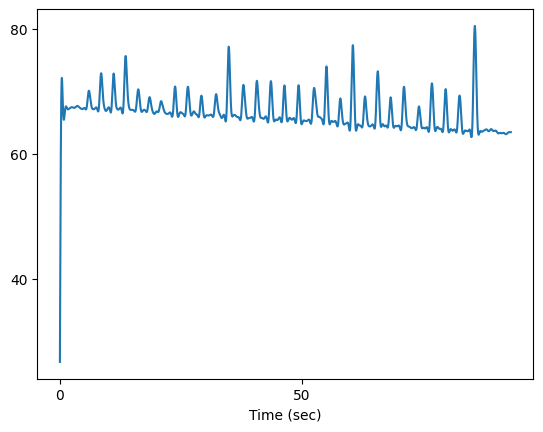

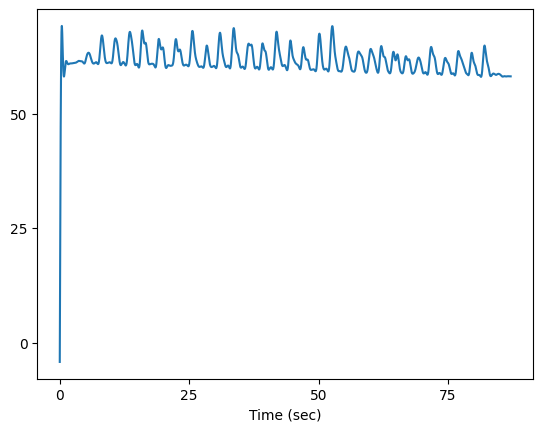

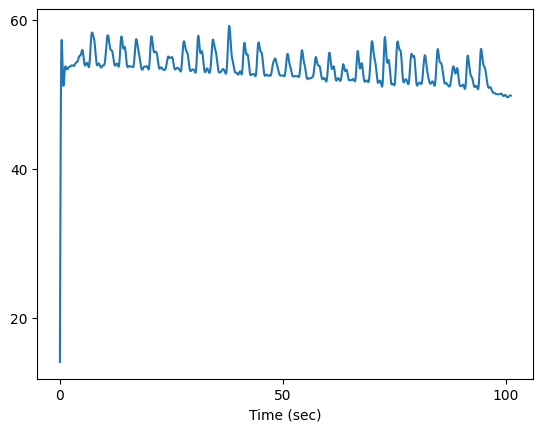

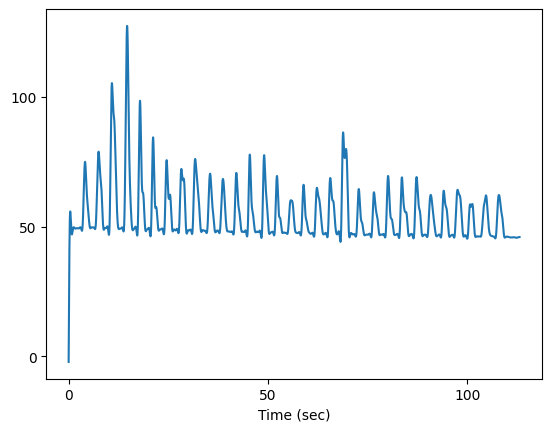

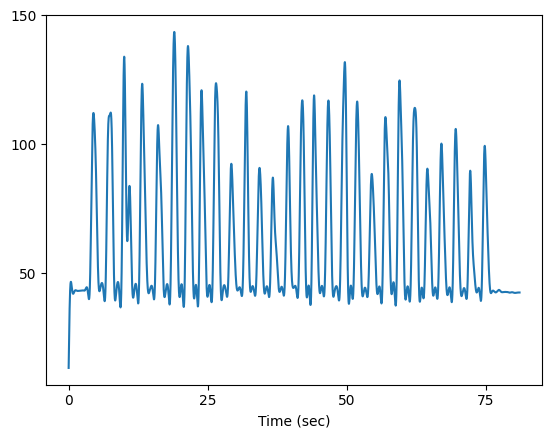

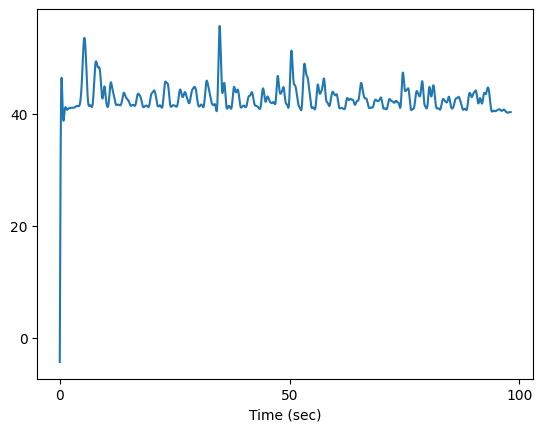

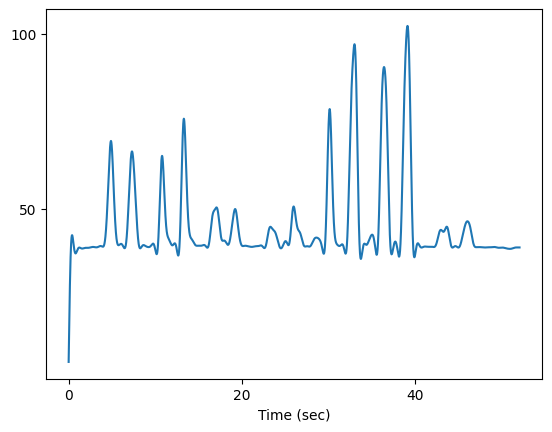

In [158]:
## Signal rectification and envelope extraction
def filteremg(time, emg, low_pass, sfreq=1000, high_band=20, low_band=450):

    emg=remove_dc_component(emg)
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = butter(4, low_pass, btype='lowpass')
    emg_envelope = filtfilt(b2, a2, emg_rectified)
    
    ## plot graphs for filtered signal, rectified signal and its envelope
    fig = plt.figure()
    # plt.subplot(1, 4, 1)
    # plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    # plt.plot(time, emg)
    # plt.locator_params(axis='x', nbins=4)
    # plt.locator_params(axis='y', nbins=4)
    # plt.xlabel('Time (sec)')
    # plt.ylabel('EMG (a.u.)')
    
    # plt.subplot(1, 4, 2)
    # plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    # plt.plot(time, emg_rectified)
    # plt.locator_params(axis='x', nbins=4)
    # plt.locator_params(axis='y', nbins=4)
    # plt.xlabel('Time (sec)')

    # plt.subplot(1, 4, 3)
    # plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.xlabel('Time (sec)')

    plt.show()
    return emg_envelope

emg_envelope_0=filteremg(time_0, emg_data_0, low_pass=0.5)
emg_envelope_1=filteremg(time_1, emg_data_1, low_pass=0.5)
emg_envelope_2=filteremg(time_2, emg_data_2, low_pass=0.5)
emg_envelope_3=filteremg(time_3, emg_data_3, low_pass=0.5)
emg_envelope_4=filteremg(time_4, emg_data_4, low_pass=0.5)
emg_envelope_5=filteremg(time_5, emg_data_5, low_pass=0.5)
emg_envelope_6=filteremg(time_6, emg_data_6, low_pass=0.5)


In [159]:
# ## Segmentation option 1 : peak segmentation ## 
# def segment_signal_events_plot_ter(signal, min_distance,nb):
#     mean=np.mean(signal)
#     maximum=np.max(signal)
#     # threshold=mean+maximum/30 # option default
#     threshold=mean+maximum/30 # for 30
#     #### https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html ###
#     peaks, _ = find_peaks(signal, height=threshold, distance=min_distance) # for 20 reps # good
#     segments = []
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(signal, color='blue', label='EMG Signal')
#     i=0
#     for peak in peaks:
#         i+=1
#         # start = max(0, peak - min_distance)
#         # end = min(len(signal), peak + min_distance)
#         start = max(0, peak - min_distance // 2)
#         end = min(len(signal), peak + min_distance // 2)
#         segment = signal[start:end]
#         segments.append((segment))  # Store start and end indices along with segment
        
#         # Plot vertical lines at detected peak positions
#         plt.axvline(x=start, color='red', linestyle='--', linewidth=1)
#         plt.axvline(x=end, color='green', linestyle='--', linewidth=1)

#         # Plot the segments
#         plt.plot(range(start, end), segment, color='orange', label='Segment {}'.format(i))
        
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.title('EMG Signal with Event-Based Segmentation')
#     plt.legend()
#     plt.savefig('example_plot'+str(nb)+'.png')
#     plt.grid(True)
#     plt.show()
#     return segments

# min_distance = 3500 # for 20 reps
# segments_0 = segment_signal_events_plot_ter( emg_envelope_0, min_distance,0)
# segments_1 = segment_signal_events_plot_ter( emg_envelope_1, min_distance,1)
# segments_2 = segment_signal_events_plot_ter( emg_envelope_2, min_distance,2)
# segments_3 = segment_signal_events_plot_ter( emg_envelope_3, min_distance,3)
# segments_4 = segment_signal_events_plot_ter( emg_envelope_4, min_distance,3)
# segments_5 = segment_signal_events_plot_ter( emg_envelope_5, min_distance,3)
# segments_6 = segment_signal_events_plot_ter( emg_envelope_6, min_distance,3)

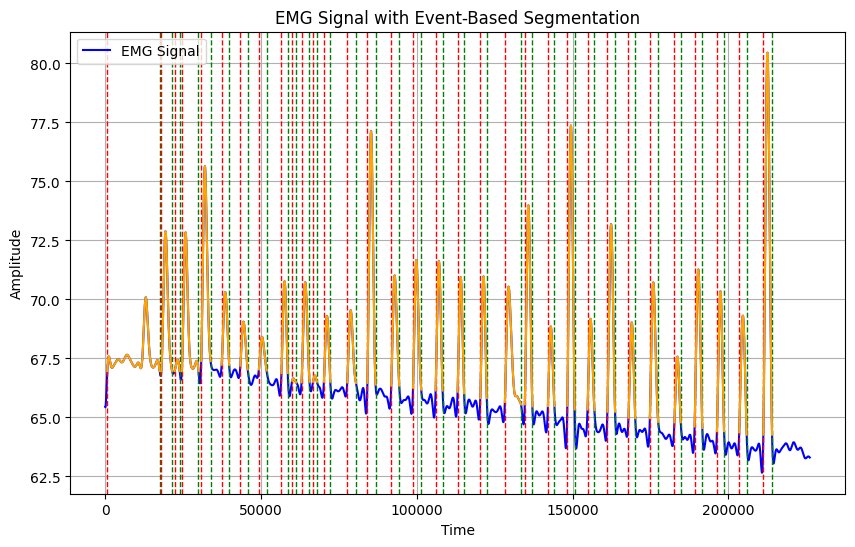

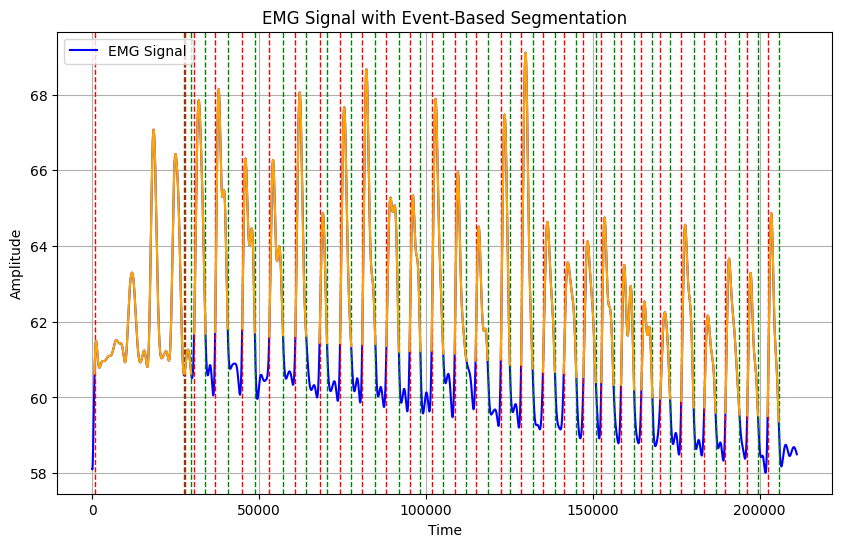

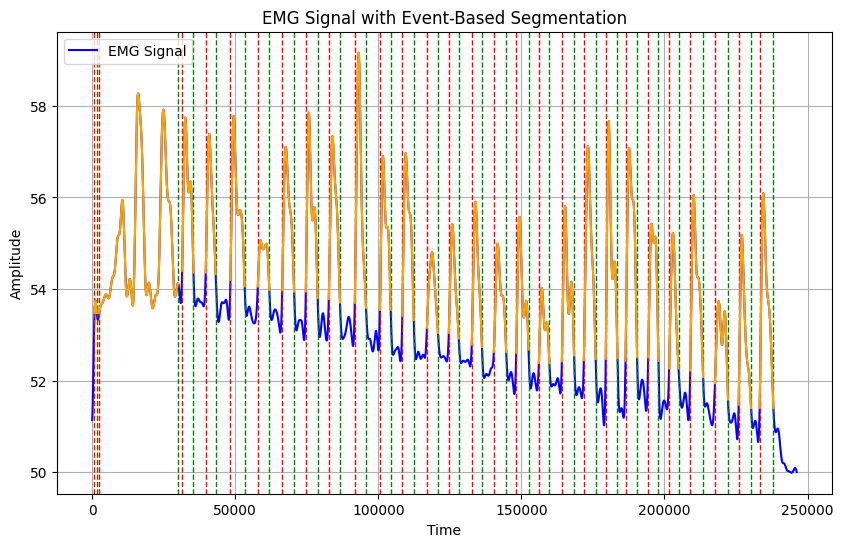

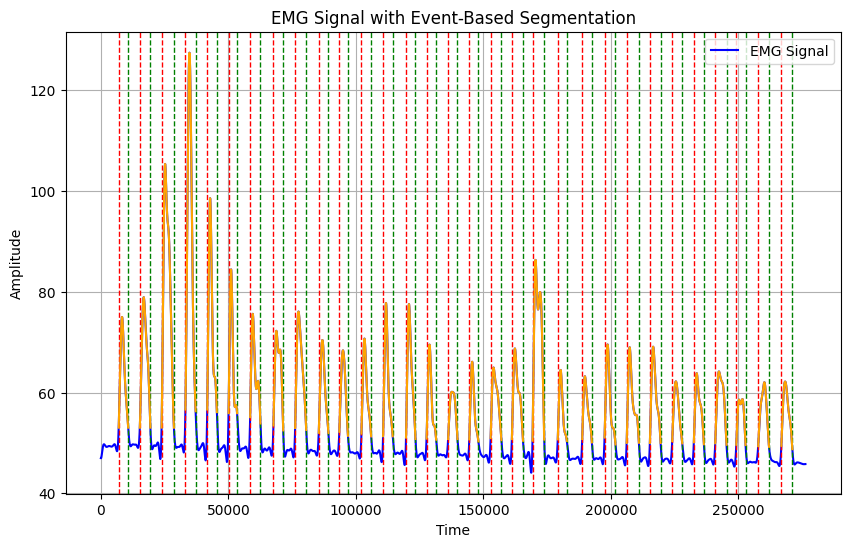

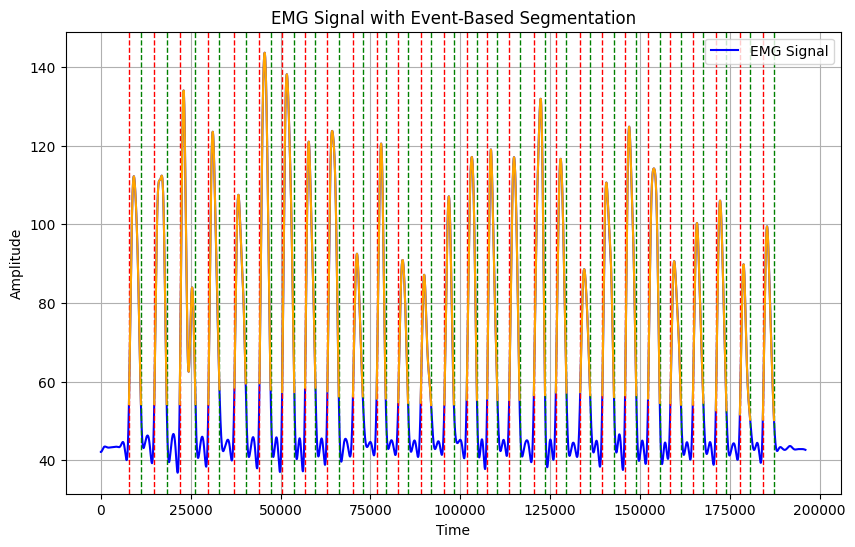

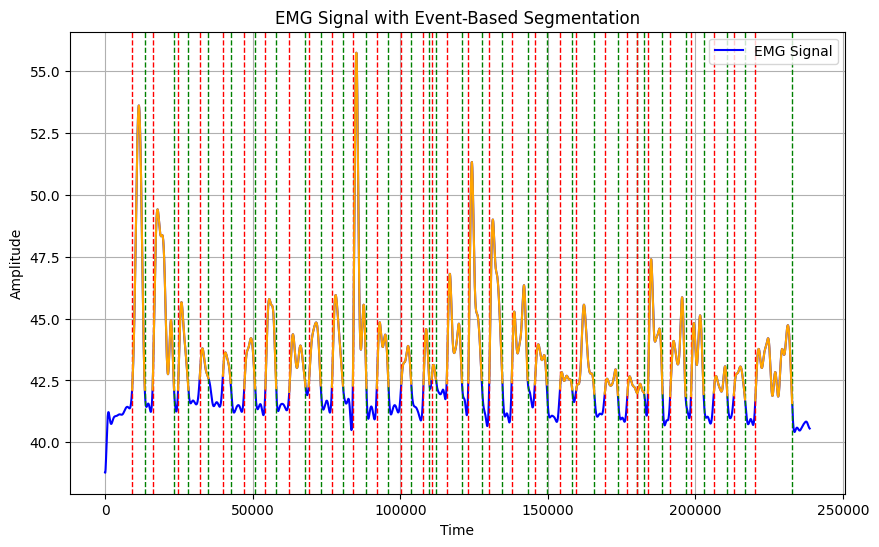

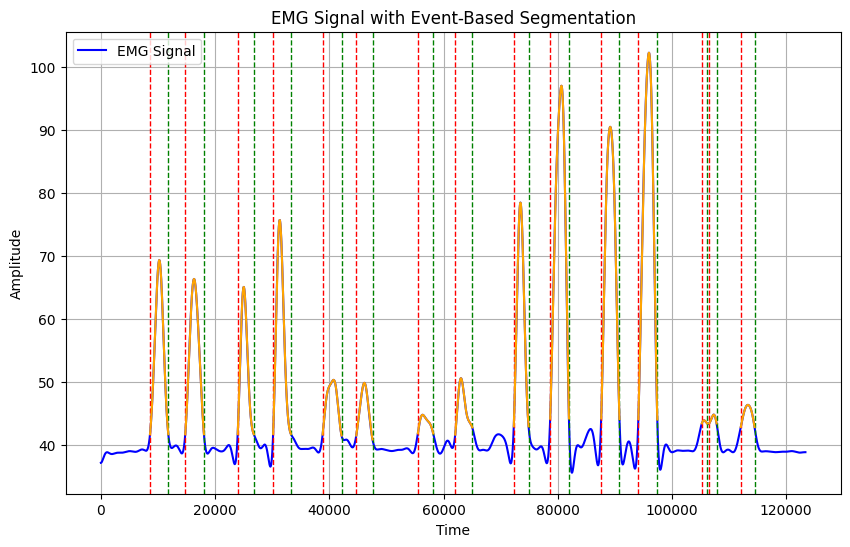

In [160]:
# Segmentation option 2 : event based segmentation

def segment_signal_events(signal, nb):
    step=25000
    mean=np.mean(signal[:step])
    mini=np.min(signal[:step])
    threshold=(2*mean+1*mini)/3
    l=len(signal)
    segments = []
    
    plt.figure(figsize=(10, 6))
    plt.plot(signal, color='blue', label='EMG Signal')
    i=0
    start=0
    start_find=0 # 0 for no
    nb_seg=0
    end=l-1
    while i < l:
        if i%5000==0 and i>step:
            mean=np.mean(signal[i-step:i+step])
            mini=np.min(signal[i-step:i+step])
            threshold=((2*mean+1*mini)/3)

        if signal[i]>threshold and start_find==0:
            start = i
            start_find=1
        elif signal[i]<threshold and start_find==1:
            end=i
            segment = signal[start:end]
            segments.append((segment))  # Store start and end indices along with segment
            
            # Plot vertical lines at detected peak positions
            plt.axvline(x=start, color='red', linestyle='--', linewidth=1)
            plt.axvline(x=end, color='green', linestyle='--', linewidth=1)
            # Plot the segments
            nb_seg+=1
            plt.plot(range(start, end), segment, color='orange')
            start_find=0
        i+=1
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('EMG Signal with Event-Based Segmentation')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return segments

#skip beginning and end of signal since many outliers come from there !
segments_0 = segment_signal_events( emg_envelope_0[2000:-5000],0) 
segments_1 = segment_signal_events( emg_envelope_1[2000:-5000],1)
segments_2 = segment_signal_events( emg_envelope_2[2000:-5000],2)
segments_3 = segment_signal_events( emg_envelope_3[2000:-5000],3)
segments_4 = segment_signal_events( emg_envelope_4[2000:-5000],4)
segments_5 = segment_signal_events( emg_envelope_5[2000:-5000],5)
segments_6 = segment_signal_events( emg_envelope_6[2000:-5000],6)



In [161]:
# Segmentation option 3 : window segmentation

def segment_signal(signal, sampling_rate, window_length_ms):
    segments = []
    nb_seg=0
    
    plt.figure(figsize=(10, 6))
    plt.plot(signal, color='blue', label='EMG Signal')

    window_length_samples = int(window_length_ms * sampling_rate / 1000)  # Convert window length from milliseconds to samples
    overlap_samples = window_length_samples // 2  # 50% overlap

    num_samples = len(signal)
    segments = []
    start = 0

    while start + window_length_samples <= num_samples:
        nb_seg+=1
        segments.append(signal[start:start+window_length_samples])
         # Plot vertical lines at detected peak positions
        plt.axvline(x=start, color='red', linestyle='--', linewidth=1)
        plt.axvline(x=start+window_length_samples, color='green', linestyle='--', linewidth=1)
        a=len(signal[start:start+window_length_samples])

        # Plot the segments
        plt.plot(range(start, start+a), signal[start:start+window_length_samples], color='orange')
        start += window_length_samples - overlap_samples
    
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('EMG Signal with Event-Based Segmentation')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return segments

# window_length_ms = 3000  # Length of each window (e.g., 300 milliseconds), found in literature
# segments_0=segment_signal(emg_envelope_0[2000:-5000], sampling_rate, window_length_ms)
# segments_1=segment_signal(emg_envelope_1[2000:-5000], sampling_rate, window_length_ms)
# segments_2=segment_signal(emg_envelope_2[2000:-5000], sampling_rate, window_length_ms)
# segments_3=segment_signal(emg_envelope_3[2000:-5000], sampling_rate, window_length_ms)
# segments_4=segment_signal(emg_envelope_4[2000:-5000], sampling_rate, window_length_ms)
# segments_5=segment_signal(emg_envelope_5[2000:-5000], sampling_rate, window_length_ms)
# segments_6=segment_signal(emg_envelope_6[2000:-5000], sampling_rate, window_length_ms)

In [162]:
## Features extraction ##
def extract_features(segments):
    n=len(segments)
    features = np.zeros([n,13])
    i=0
    for segment in segments:
        mean = np.mean(segment)
        std_dev = np.std(segment)
        variance = np.var(segment)
        skewness = np.mean((segment - mean) ** 3) / (std_dev ** 3)
        kurtosis = np.mean((segment - mean) ** 4) / (std_dev ** 4)
        rms = np.sqrt(np.mean(segment ** 2))
        waveform_length = np.sum(np.abs(np.diff(segment)))
        mav = np.mean(np.abs(segment))
        max_value = np.max(segment)
        zero_crossings = np.sum(np.diff(np.sign(segment)) != 0)
        slope_sign_changes = np.sum(np.diff(np.sign(np.diff(segment))) != 0)
        activity = np.std(segment)
        diff1 = np.diff(segment)
        diff2 = np.diff(diff1)
        mobility = np.sqrt(np.var(diff1) / np.var(segment))
        complexity = np.sqrt(np.var(diff2) / np.var(diff1)) / mobility

        features[i,:]=[mean, std_dev, variance, skewness, kurtosis, rms, waveform_length,mav, max_value, zero_crossings, slope_sign_changes, activity, complexity]
        i+=1
    return np.array(features)

segment_features_0 = extract_features(segments_0)
segment_features_1 = extract_features(segments_1)
segment_features_2 = extract_features(segments_2)
segment_features_3 = extract_features(segments_3)
segment_features_4 = extract_features(segments_4)
segment_features_5 = extract_features(segments_5)
segment_features_6 = extract_features(segments_6)

class_0=[0]*len(segment_features_0)
class_1=[1]*len(segment_features_1)
class_2=[2]*len(segment_features_2)
class_3=[3]*len(segment_features_3)
class_4=[4]*len(segment_features_4)
class_5=[5]*len(segment_features_5)
class_6=[6]*len(segment_features_6)

In [163]:
# individual saving for each features extraction for each class movement
def saving(segment,class_mov,output_path):
    segment=np.hstack((segment, np.expand_dims(class_mov, axis=1)))
    df = pd.DataFrame(segment)
    df.to_csv(output_path, index=False, header=False)
    return

## saving of the features for subject 1
saving(segment_features_0,class_0,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\0_features.csv")
saving(segment_features_1,class_1,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\1_features.csv")
saving(segment_features_2,class_2,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\2_features.csv")
saving(segment_features_3,class_3,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\3_features.csv")
saving(segment_features_4,class_4,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\4_features.csv")
saving(segment_features_5,class_5,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\5_features.csv")
saving(segment_features_6,class_6,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\6_features.csv")

## saving of the features for subject 2
# saving(segment_features_0,class_0,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\0_features.csv")
# saving(segment_features_1,class_1,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\1_features.csv")
# saving(segment_features_2,class_2,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\2_features.csv")
# saving(segment_features_3,class_3,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\3_features.csv")
# saving(segment_features_4,class_4,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\4_features.csv")
# saving(segment_features_5,class_5,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\5_features.csv")
# saving(segment_features_6,class_6,output_path = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\6_features.csv")

# For 7 movements
class_tot = np.hstack((class_0, class_1,class_2,class_3,class_4,class_5,class_6)) # to change for all fingers
segment_features = np.vstack((segment_features_0, segment_features_1,segment_features_2,segment_features_3,segment_features_4,segment_features_5,segment_features_6))# to change for all fingers

class_tot=np.expand_dims(class_tot, axis=1)
result = np.hstack((segment_features, class_tot))
df = pd.DataFrame(result)
output_path_features = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\global_features.csv"  # for 30 rep signal
df.to_csv(output_path_features, index=False, header=False)

C:\Users\emmie\AppData\Local\Temp\ipykernel_32164\1629031558.py:17: RuntimeWarning: divide by zero encountered in divide
  Y2 = Y2 * (1 / np.std(Y2, 0))
C:\Users\emmie\AppData\Local\Temp\ipykernel_32164\1629031558.py:17: RuntimeWarning: invalid value encountered in multiply
  Y2 = Y2 * (1 / np.std(Y2, 0))


V1 [ 0.34448713  0.35015629  0.34383947 -0.05441671 -0.09357203  0.34787599
  0.34686228  0.34448713  0.36191023 -0.         -0.09359917  0.35015629
 -0.08015567] V2 [-0.0331003  -0.0621127  -0.06030913 -0.5061659  -0.3548364  -0.03499991
 -0.09245578 -0.0331003  -0.06549749 -0.         -0.53304478 -0.0621127
 -0.55330196]


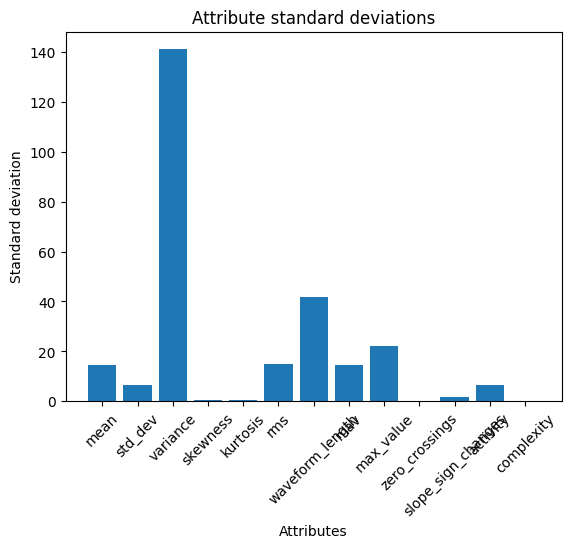

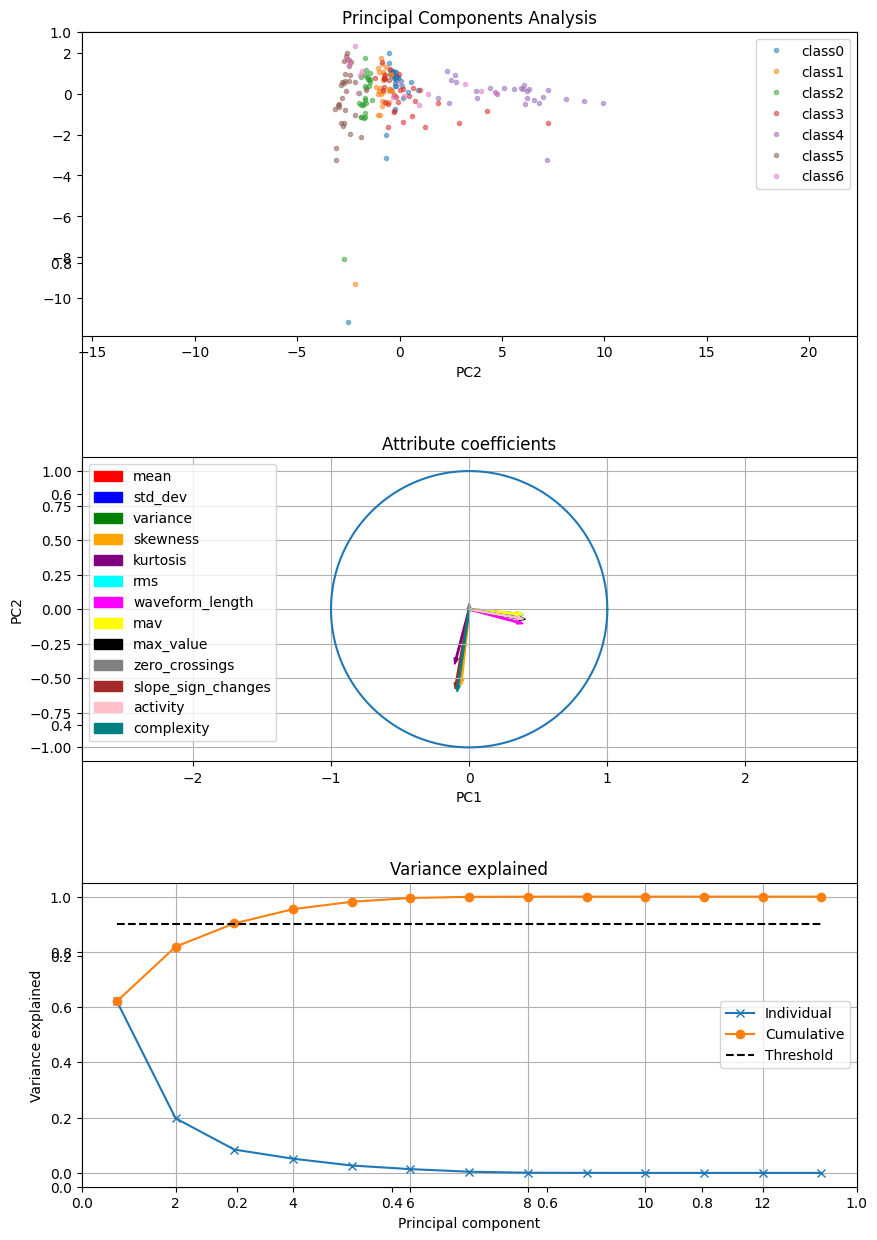

In [164]:
## PCA study
from scipy.linalg import svd
X=result[:,:-1]
y=result[:,-1]
N = len(y)
r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.xticks(rotation=45)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("Attribute standard deviations")

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))
Ys = [Y2]
Ys = np.nan_to_num(Ys, nan=0)

titles = ["", ""]
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
plt.title("Principal Components Analysis")
nrows = 3
ncols = 1
k=0
# Obtain the PCA solution by calculate the SVD of Y2
U, S, Vh = svd(Ys[k], full_matrices=False)
V = Vh.T  # For the direction of V to fit the convention in the course we transpose
V = -V
U = -U

# Compute variance explained
rho = (S * S) / (S * S).sum()

# Compute the projection onto the principal components
Z = U * S

# Plot projection
plt.subplot(nrows, ncols, 1)
C = len(classNames)
for c in range(C):
    plt.plot(Z[y == c, i], Z[y == c, j], ".", alpha=0.5)
plt.xlabel("PC" + str(i + 1))
plt.xlabel("PC" + str(j + 1))
# plt.title(titles[k] + "\n" + "Projection")
plt.legend(classNames)
plt.axis("equal")

# Plot attribute coefficients in principal component space
print('V1',V[:, i], 'V2',V[:, j])
plt.subplot(nrows, ncols, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'brown', 'pink', 'teal']
for att in range(V.shape[1]):
    plt.arrow(0, 0, V[att, i], V[att, j],color=colors[att],label=attributeNames[att],width=0.01)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PC" + str(i + 1))
plt.ylabel("PC" + str(j + 1))
plt.grid()
# Add a unit circle
plt.plot(
    np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01))
)
plt.title(titles[k] + "\n" + "Attribute coefficients")
plt.axis("equal")


# Plot cumulative variance explained
plt.subplot(nrows, ncols, 3)
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.title(titles[k] + "\n" + "Variance explained")

plt.show()


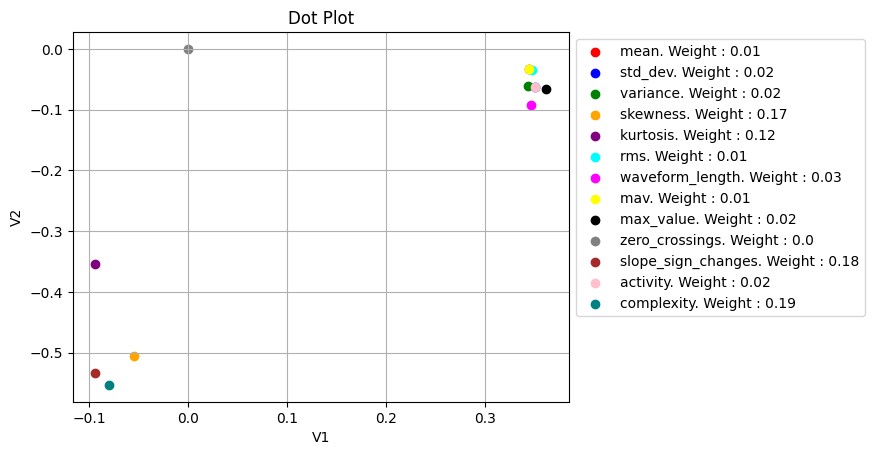

In [165]:

values=[]
for i in V[:, 0]: 
    for j in V[:, 1]:
        values.append(round(abs(i*j), 2))

for i, (x, y) in enumerate(zip(V[:, 0],V[:, 1])):
    plt.scatter(x, y, color=colors[i], label=attributeNames[i]+'. Weight : '+str(values[i])
    )
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add labels and title
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Dot Plot')

# Show plot
plt.grid(True)
plt.show()

     principal component 1  principal component 2  class
0                -2.536512              11.148277    0.0
1                -0.206038               0.763931    0.0
2                -0.491924              -1.514489    0.0
3                -0.672762               3.158053    0.0
4                 0.176487               0.231713    0.0
..                     ...                    ...    ...
190               3.189391              -0.452312    6.0
191               4.710125              -0.008577    6.0
192              -2.540341              -1.755147    6.0
193              -2.473607              -1.418480    6.0
194              -2.175191              -2.344531    6.0

[195 rows x 3 columns]
[0.62093686 0.19763172]


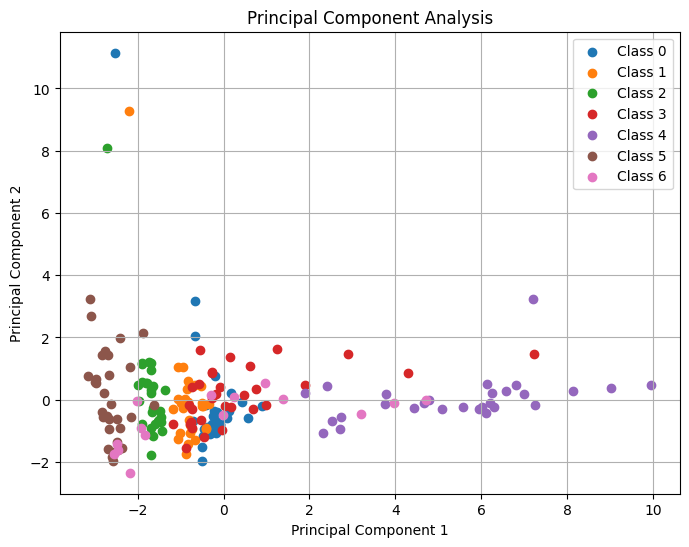

Principal Component 1: 0.6209368582684057
Principal Component 2: 0.1976317181582407


In [166]:
## PCA with 2 PC

def rank_features_with_pca(result):
    features=result[:,:-1]
    y=result[:,-1]
    N = len(y)
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply PCA
    pca = PCA(n_components=2)
    # pca.fit(scaled_features)
    principalComponents=pca.fit_transform(scaled_features)
    principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    classpca = pd.DataFrame(data = y
             , columns = ['class'])
    Z=pd.concat([principal_Df, classpca], axis=1)
    print(Z)

    # Get the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(pca.explained_variance_ratio_)

    components = pca.components_

    classes = Z['class'].unique()
    # Plot PC1 against PC2 with different colors for each class
    plt.figure(figsize=(8, 6))
    for c in classes:
        plt.scatter(Z[Z['class'] == c]['principal component 1'], 
                    Z[Z['class'] == c]['principal component 2'], 
                    label=f'Class {int(c)}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Principal Component Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()

    df = pd.DataFrame(Z)
    df.to_csv(output_path_pca, index=False, header=False)

    # Return the explained variance ratio
    return explained_variance_ratio

# Apply PCA feature ranking
column_names = attributeNames

explained_variance_ratio = rank_features_with_pca(result)
for i, explained_var in enumerate(explained_variance_ratio):
    print(f'Principal Component {i+1}: {explained_var}')


[0.62093686 0.19763172 0.0844406 ]


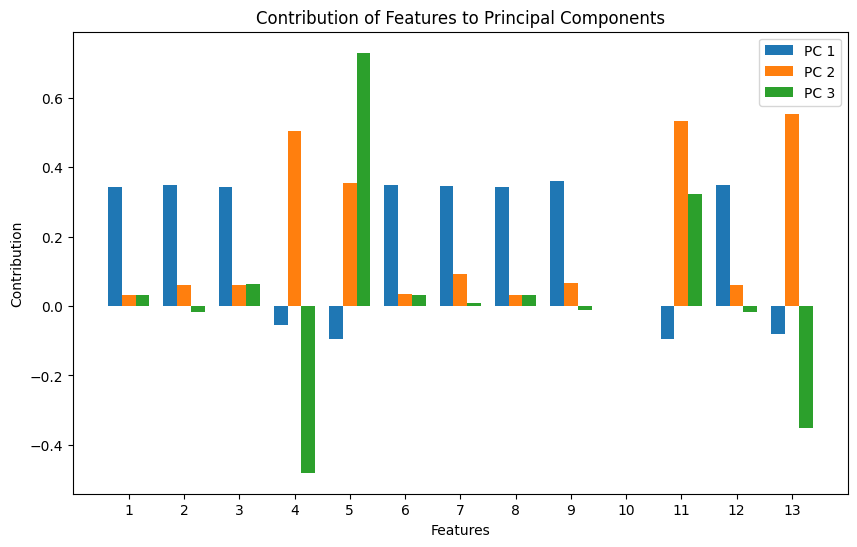

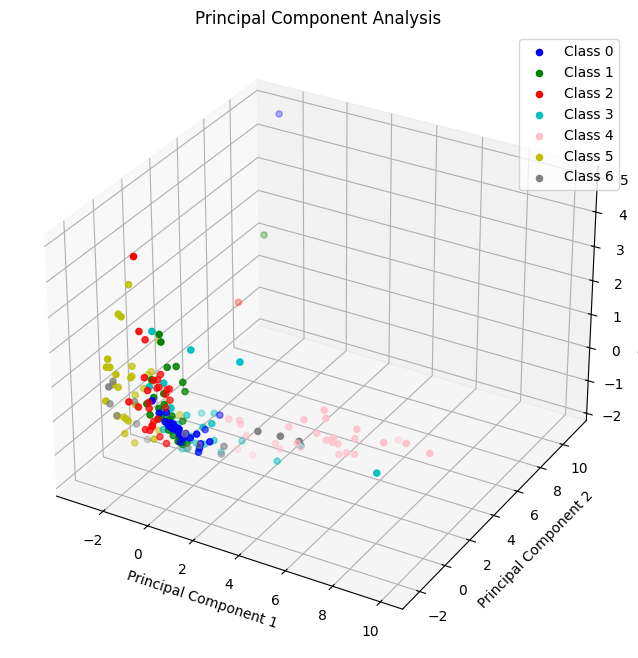

df      principal component 1  principal component 2  principal component 3  \
0                -2.536512              11.148277               4.833825   
1                -0.206038               0.763931              -1.529694   
2                -0.491924              -1.514489               0.367559   
3                -0.672762               3.158053              -1.336675   
4                 0.176487               0.231713              -1.136383   
..                     ...                    ...                    ...   
190               3.189391              -0.452312               0.222050   
191               4.710125              -0.008577               0.090034   
192              -2.540341              -1.755147               0.305276   
193              -2.473607              -1.418480              -0.139847   
194              -2.175191              -2.344531               1.074439   

     class  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
..    

In [167]:
## PCA for 3 PC
def rank_features_with_pca(result):
    features=result[:,:-1]
    y=result[:,-1]

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply PCA
    pca = PCA(n_components=3)
    principalComponents=pca.fit_transform(scaled_features)
    principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
    classpca = pd.DataFrame(data = y
             , columns = ['class'])
    Z=pd.concat([principal_Df, classpca], axis=1)

    # Get the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(pca.explained_variance_ratio_)

    components = pca.components_

    vect1=components[0]
    vect2=components[1]
    vect3=components[2]
    num_features = len(vect1)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set positions for bars
    positions = np.arange(num_features)

    # Width of bars
    width = 0.25

    # Plot bars for each principal component
    ax.bar(positions, vect1, width, label='PC 1')
    ax.bar(positions + width, vect2, width, label='PC 2')
    ax.bar(positions + 2*width, vect3, width, label='PC 3')

    # Set labels and title
    ax.set_xticks(positions + width)
    ax.set_xticklabels([f'{j+1}' for j in range(num_features)])
    ax.set_xlabel('Features')
    ax.set_ylabel('Contribution')
    ax.set_title('Contribution of Features to Principal Components')
    ax.legend()

    # Show plot
    plt.show()

    classes = Z['class'].unique()
    # Plot PC1 against PC2 with different colors for each class
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    classes = Z['class'].unique()
    colors = ['b', 'g', 'r', 'c','pink','y','gray']  # Adjust colors as needed
    for c, color in zip(classes, colors):
        ax.scatter(Z[Z['class'] == c]['principal component 1'], 
                   Z[Z['class'] == c]['principal component 2'],
                   Z[Z['class'] == c]['principal component 3'], 
                   c=color, label=f'Class {int(c)}')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Principal Component Analysis')
    ax.legend()
    plt.show()

    df = pd.DataFrame(Z)
    print('df',df)
    df.to_csv(output_path_pca3, index=False, header=False)

    # Return the explained variance ratio
    return explained_variance_ratio

# Apply PCA feature ranking
column_names = attributeNames
explained_variance_ratio = rank_features_with_pca(result)
for i, explained_var in enumerate(explained_variance_ratio):
    print(f'Principal Component {i+1}: {explained_var}')


In [170]:
## PCA for 4 to 5 PCs
def rank_features_with_pca(result):
    features=result[:,:-1]
    y=result[:,-1]

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply PCA
    pca = PCA(n_components=4)
    principalComponents=pca.fit_transform(scaled_features)
    # principal_Df = pd.DataFrame(data = principalComponents
    #          , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5'])
    principal_Df = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
    classpca = pd.DataFrame(data = y
             , columns = ['class'])
    Z=pd.concat([principal_Df, classpca], axis=1)
    print(Z)

    # Get the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(pca.explained_variance_ratio_)

    components = pca.components_

    df = pd.DataFrame(Z)
    print('df',df)
    # output_path_pca4 = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\global_pca5.csv"
    output_path_pca4 = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\global_pca4.csv"
    df.to_csv(output_path_pca4, index=False, header=False)

    # Return the explained variance ratio
    return explained_variance_ratio

# Apply PCA feature ranking
column_names =attributeNames
explained_variance_ratio = rank_features_with_pca(result)
for i, explained_var in enumerate(explained_variance_ratio):
    print(f'Principal Component {i+1}: {explained_var}')


     principal component 1  principal component 2  principal component 3  \
0                -2.536512              11.148277               4.833825   
1                -0.206038               0.763931              -1.529694   
2                -0.491924              -1.514489               0.367559   
3                -0.672762               3.158053              -1.336675   
4                 0.176487               0.231713              -1.136383   
..                     ...                    ...                    ...   
190               3.189391              -0.452312               0.222050   
191               4.710125              -0.008577               0.090034   
192              -2.540341              -1.755147               0.305276   
193              -2.473607              -1.418480              -0.139847   
194              -2.175191              -2.344531               1.074439   

     principal component 4  class  
0                 1.875945    0.0  
1              

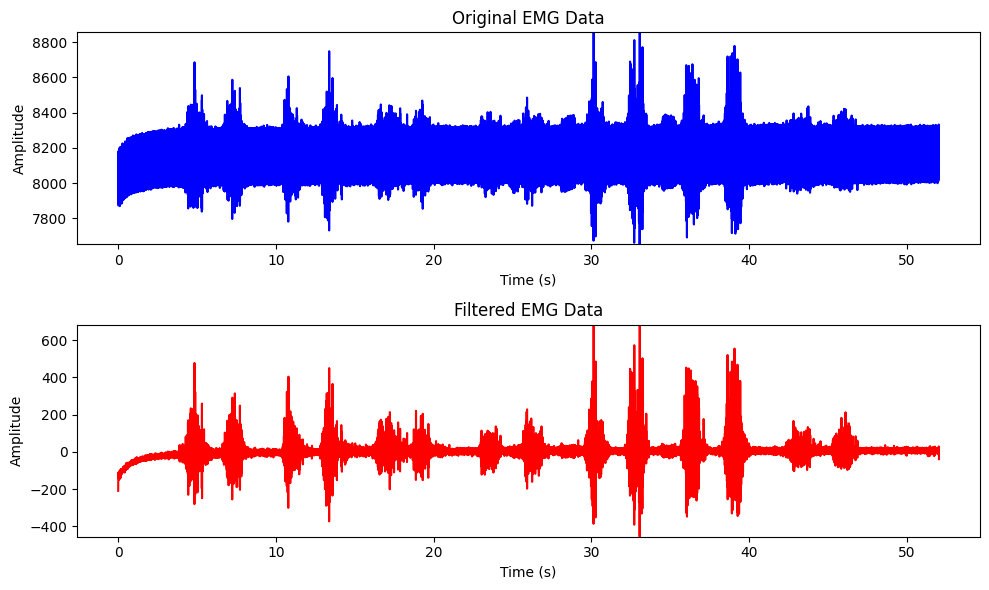

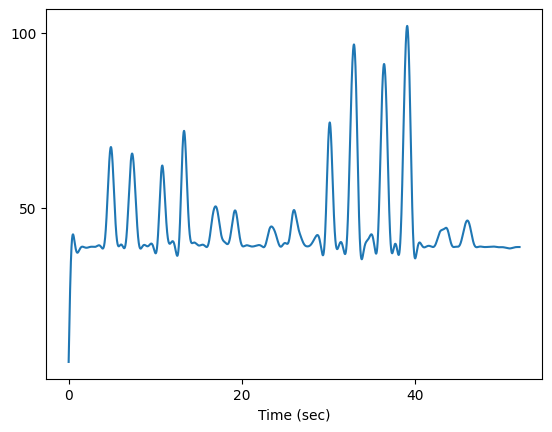

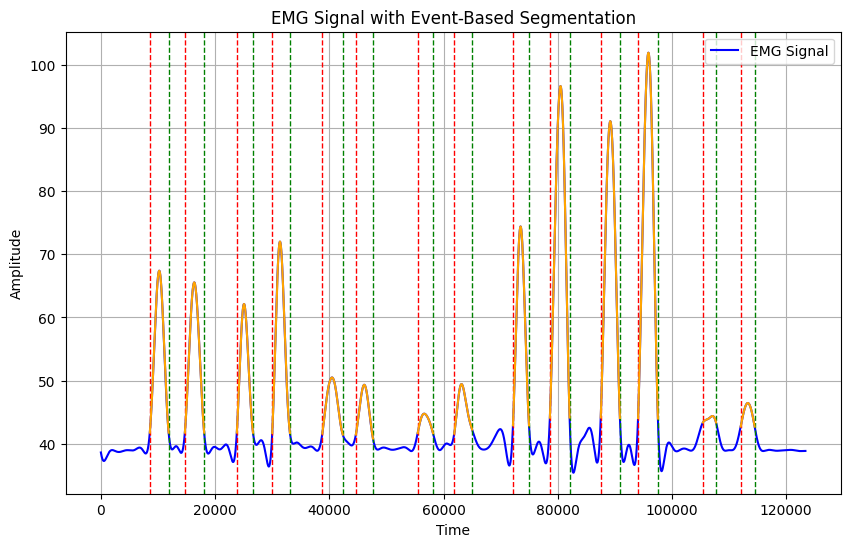

14
    principal component 1  principal component 2  class
0                0.587198              -1.354081    0.0
1                0.172102              -0.790283    0.0
2               -0.232150              -1.220318    1.0
3                1.315346              -1.469767    1.0
4               -2.089986              -0.357387    2.0
5               -2.196705              -0.705555    2.0
6               -4.006944               3.032084    3.0
7               -1.880145              -1.965357    3.0
8                1.349267              -0.367569    4.0
9                4.569171               1.172164    4.0
10               3.674275               1.026852    5.0
11               5.458892               1.249549    5.0
12              -3.100636              -0.736416    6.0
13              -3.619684               2.486084    6.0
[0.77698859 0.1989413 ]
Components (Features' contributions to PCs):
[[ 0.33701367  0.33982388  0.32411204  0.10813314 -0.21155394  0.33687545
   0.33965024 

In [173]:
# for the new dataset : a serie of the 7 movements repeted twice 

## for subject 1
# read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-76\emg.dat",r".\our_input_30\mix.csv",r".\our_input_30\emg_mix.csv",6) # serie mix
# df_mix= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\emg_mix.csv", header=None)
# output_path_saving = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\mix_features.csv"
# output_path_features_mix = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\mix_features.csv"  # for 30 rep signal
# output_path_mix = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_30\mix_pca5.csv"

## for subject 2
read(r"C:\Users\emmie\Documents\DTU\Special course\Code\EMG\recording-65\emg.dat",r".\our_input_subject2\mix.csv",r".\our_input_subject2\emg_mix.csv",6) # serie mix
df_mix= pd.read_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\emg_mix.csv", header=None)
output_path_saving = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\mix_features.csv"
output_path_features_mix = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\mix_features.csv"  # for 30 rep signal
output_path_mix = r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\mix_pca4.csv"

## We repete all the previous process for this new dataset (filtering, segmentation, features, PCA)
df_mix = df_mix.drop(0)
df_mix = df_mix.reset_index(drop=True)
emg_data_mix = df_mix.iloc[0:, 0].values 
emg_data_mix = emg_data_mix.astype(float)
time_mix = np.arange(0, len(emg_data_mix)/sampling_rate, 1/sampling_rate)[0:len(emg_data_mix)]
emg_data_filtered_mix = remove_high_frequency(remove_50hz_line_noise(remove_dc_component(emg_data_mix), sampling_rate), sampling_rate, 700)
plotting(emg_data_mix,emg_data_filtered_mix,time_mix)
emg_envelope_mix=filteremg(time_mix, emg_data_mix, low_pass=0.4)
segments_mix = segment_signal_events(emg_envelope_mix[2000:-5000],'mix') # event based segmentation
print(len(segments_mix))
# segments_mix=segment_signal(emg_envelope_mix[2000:-5000], sampling_rate, window_length_ms)
segment_features_mix = extract_features(segments_mix)
class_mix=[0,0,1,1,2,2,3,3,4,4,5,5,6,6]

saving(segment_features_mix,class_mix,output_path_saving)

class_mix=np.expand_dims(class_mix, axis=1)
mix_serie = np.hstack((segment_features_mix, class_mix))
df = pd.DataFrame(mix_serie)
df.to_csv(output_path_features_mix, index=False, header=False)

# explained_variance_ratio = rank_features_with_pca(mix_serie)

#### try to apply a new pca
mix_features=mix_serie[:,:-1]
y=mix_serie[:,-1]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mix_features)
pca = PCA(n_components=4)
principalComponents=pca.fit_transform(scaled_features)
# principal_Df = pd.DataFrame(data = principalComponents
#          , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
principal_Df = pd.DataFrame(data = principalComponents
        , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
classpca = pd.DataFrame(data = y
            , columns = ['class'])
Z=pd.concat([principal_Df, classpca], axis=1)
print(Z)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

components = pca.components_
print("Components (Features' contributions to PCs):")
print(components)

df = pd.DataFrame(Z)
print('df',df)
df.to_csv(output_path_mix, index=False, header=False)

